<a href="https://colab.research.google.com/github/calerovillalobos10/Veax-vs-Pandas-Limpieza_Transf_Data-/blob/main/Tarea_PF3347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 Limpieza y Transformación de Datos

## Estudiantes

*   Bryan Thomas Calero Villalobos
*   Daniela Montero Parkinson
*   Christopher Zúñiga Cárdenas

# Uso Práctico

## Extracción de datos

Se descarga la librería gdown para poder descargar archivos grandes desde drive

Estas es una herramienta de Python que facilita la descarga de archivos desde Google Drive, incluidos archivos de gran tamaño. Dado que, los métodos convencionales como wget no pueden gestionar bien las restricciones de Google Drive, como los límites de tamaño o las confirmaciones de descarga. Esto gdown lo resuelve de forma automática, ya que está diseñada específicamente para interactuar con las URLs de Google Drive

In [1]:
!pip install gdown

Se descargar el archivo del .csv que se encuentra en drive

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-'
output = 'BenefitsCostSharing.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-
From (redirected): https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-&confirm=t&uuid=dac0ff26-506a-443b-a2cf-a3f95d957744
To: /content/BenefitsCostSharing.csv
100%|██████████| 1.33G/1.33G [00:20<00:00, 64.8MB/s]


'BenefitsCostSharing.csv'

Se convierte el archivo csv descargado a DataFrame con el fin de poder manipular y revisar los datos de forma más sencilla

In [3]:
import pandas as pd

# Cargar el archivo CSV en un dataframe
df_benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv')

<ipython-input-3-fa240b62a261>:4: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv')


Se imprimen las primeras 5 filas para visualizar el tipo de datos y estructuras

In [4]:
# Mostrar las primeras filas del dataframe
df_benefits_cost_sharing.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


## Análisis EDA

### Explicación del DataSet ###

El dataset seleccionado pertenece al  Centro de Información al Consumidor y Supervisión de Seguros (CCIIO) de los Centros de Medicare y Medicaid (CMS). Según Centers for Medicare & Medicaid Services(2024), los datos contienen la información del 2014 al 2024 de las variantes en los planes del beneficio esencial de salud, los límites de cobertura, los costos planes de salud calificados (QHPs) y los costos de planes dentales independientes (SADPs).

A continuación se detallará las columnas del dataset:
* **BenefitName**: Nombre del beneficio asignado.

* **BusinessYear**: Año para el cual el plan ofrece cobertura a los afiliados.

* **CoinsInnTier1**: Valor numérico del porcentaje de coaseguro para los servicios dentro de la red para el nivel 1 de un beneficio.

* **CoinsInnTier2**: Valor numérico del porcentaje de coaseguro para los servicios dentro de la red para el nivel 2 de un beneficio.

* **CoinsOutofNet**: Valor numérico del porcentaje de coaseguro para los servicios fuera de la red.

* **CopayInnTier1**: Monto en dólares para el copago en red para el nivel 1 de un beneficio.

* **CopayInnTier2**: Monto en dólares para el copago en red para el nivel 2 de un beneficio.

* **CopayOutofNet**: Monto en dólares para el copago fuera de la red.

* **EHBVarReason**: Justificación para no utilizar la información preestablecida de los beneficios esenciales de salud del formulario.

* **Exclusions**: Campo opcional que indica exclusiones; si está en blanco, no se proporcionó valor, y podría truncarse a 256 caracteres si se exporta a Excel o Access.
* **ImportDate**: Fecha en la que se cargaron los datos.

* **IsCovered**: Indica si el plan de seguro incluye la cobertura de este beneficio.

* **IsEHB**: Indica si el beneficio está clasificado como esencial en salud.

* **IsExclFromInnMOOP**: Señala si el costo de este beneficio no se incluye en el máximo de gasto propio dentro de la red.

* **IsExclFromOonMOOP**: Señala si el costo del beneficio está excluido del límite máximo fuera de la red.

* **IsStateMandate**: Indica si el beneficio es obligatorio según las leyes del estado.

* **IsSubjToDedTier1**: Indica si el deducible de Nivel 1 aplica a este beneficio.

* **IsSubjToDedTier2**: Indica si el deducible de Nivel 2 aplica a este beneficio.

* **IssuerId**: Código de cinco dígitos que identifica al emisor en HIOS.

* **IssuerId2**: Segundo código de cinco dígitos que identifica al emisor en HIOS.

* **LimitQty**: Límite numérico que define la cobertura del beneficio.

* **LimitUnit**: Unidad en la que se mide el límite de la cobertura.

* **MinimumStay**: Número mínimo de horas de hospitalización necesarias para este beneficio.

* **PlanId**: Código de diecisiete caracteres que identifica la variante de reducción de costos de un plan.

* **QuantLimitOnSvc**: Indica si hay un límite numérico para este servicio o beneficio.

* **RowNumber**: Número de fila en la plantilla de datos.

* **SourceName**: Identificador de la fuente de los datos importados.

* **StandardComponentId**: Código de catorce caracteres que identifica el componente estándar de un plan en HIOS.

* **StateCode**: Código de dos letras que representa el estado donde se ofrece el plan.

* **StateCode2**: Segundo código de dos letras que indica el estado donde se ofrece el plan.

* **VersionNum**: Número de versión de la importación de los datos.

###Exploración profunda del conjunto de datos###


####Consistencia y Formato de Datos####

Para la exploración del tipo de datos de cada columna, se utiliza el conocimiento dato por Centers for Medicare & Medicaid Services(2024) en donde describen la definicion de cada columna, con esto, se puede comprobar la incongruencia en el tipo de dato de cada columna.

In [5]:
print(f'Información del Data Frame: \n')
df_benefits_cost_sharing.info() # nos dice el tipo de dato por columna y cantidad de nulos

Información del Data Frame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BenefitName          object 
 1   BusinessYear         int64  
 2   CoinsInnTier1        object 
 3   CoinsInnTier2        object 
 4   CoinsOutofNet        object 
 5   CopayInnTier1        object 
 6   CopayInnTier2        object 
 7   CopayOutofNet        object 
 8   EHBVarReason         object 
 9   Exclusions           object 
 10  Explanation          object 
 11  ImportDate           object 
 12  IsCovered            object 
 13  IsEHB                object 
 14  IsExclFromInnMOOP    object 
 15  IsExclFromOonMOOP    object 
 16  IsStateMandate       object 
 17  IsSubjToDedTier1     object 
 18  IsSubjToDedTier2     object 
 19  IssuerId             int64  
 20  IssuerId2            int64  
 21  LimitQty             float64
 22  LimitUnit            object 
 23  Mi

Según se observa en el resumen  de las columnas, existen 3 tipos de datos en las 32 columnas, object, int64 y float64. Las columnas object pueden representar datos categoricos o identificadores de relaciones(id).
Las unicas columnas que poseen datos numericos son IssuerId, IssuerId2, RowNumner, BusinessYear, LimitQty, MinimumStay y VersionNum.   



Para obtener las columnas con tipos de datos númericos se puede utilizar el comando ".describe" que ademas retorna los datos de: promedio, conteo, min, max , persentiles 25/50/75 y desviacion estandar por cada variable.

In [6]:
print(f'Descripción de datos: \n')
df_benefits_cost_sharing.describe()

Descripción de datos: 



,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [7]:
#Devuelve la muestra de los 5 primeros registros de la Data
print(f'Muestra de datos: \n')
df_benefits_cost_sharing.head(10)

Muestra de datos: 



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


En las columnas CoinsInnTier1 y CoinsOutofNet, se pueden reemplazar los caracteres no numéricos para facilitar el análisis cuantitativo. Además, según la documentación, las columnas CopayInnTier1 y CopayInnTier2 utilizan tanto números como la palabra “No Charge” o valores vacíos para indicar la ausencia de datos. Sin embargo, se debe usar un valor numérico cuando esté disponible.

####Exploración de valores nulos###

Con el comando ".isnull().sum()" se determina las columnas que poseen datos vacíos en el conjunto de datos y la cantidad que poseen.

In [8]:
print(f'Cantidad de nulos: \n') #contar datos nullos
df_benefits_cost_sharing.isnull().sum()

Cantidad de nulos: 



,0
BenefitName,0
BusinessYear,0
CoinsInnTier1,1113847
CoinsInnTier2,4571587
CoinsOutofNet,1113847
CopayInnTier1,1113847
CopayInnTier2,4571587
CopayOutofNet,1113849
EHBVarReason,3020737
Exclusions,4572247


####Detección de datos duplicados####

Para evitar inflar innecesariamente los resultados de las estadísticas y llevar a conclusiones incorrectas, es necesario eliminar los duplicados del dataset.

Determinamos si el dataset posee datos duplicados con ".duplicated().sum()" para valorar si a la hora de limpiar los datos se salta la eliminación de datos duplicados.

In [9]:
print(f'Cantidad de duplicados: \n') #contar datos duplicados
df_benefits_cost_sharing.duplicated().sum()

Cantidad de duplicados: 



86

####Identificar relevancia de las variables####

 Identificar y descartar columnas que no aportan información relevante para el análisis. Las columnas con 1 o menos subniveles no son útiles porque no varían y, por lo tanto, no pueden contribuir a la diferenciación o clasificación en el análisis de datos.

In [10]:
cols_cat = df_benefits_cost_sharing.columns.tolist() # se capturan los nombres de las columnas del DF

# se inicializa un array para capturar las columnas que se descartarán por poca relevancia
col_descartadas = []

#Con este fragmento de codigo nos damos cuanta cuantos subniveles tiene cada columna, esto nos ayuda a ver cuales son las variables finales para la data
for col in cols_cat:
  print(f'Columna {col}: {df_benefits_cost_sharing[col].nunique()} subniveles o distintos.')

  if(df_benefits_cost_sharing[col].nunique() <= 1):
    col_descartadas.append(col)


Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 115 subniveles o distintos.
Columna CoinsInnTier2: 37 subniveles o distintos.
Columna CoinsOutofNet: 60 subniveles o distintos.
Columna CopayInnTier1: 516 subniveles o distintos.
Columna CopayInnTier2: 278 subniveles o distintos.
Columna CopayOutofNet: 232 subniveles o distintos.
Columna EHBVarReason: 12 subniveles o distintos.
Columna Exclusions: 1720 subniveles o distintos.
Columna Explanation: 6227 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 3 subniveles o distintos.
Columna IsEHB: 1 subniveles o distintos.
Columna IsExclFromInnMOOP: 5 subniveles o distintos.
Columna IsExclFromOonMOOP: 4 subniveles o distintos.
Columna IsStateMandate: 1 subniveles o distintos.
Columna IsSubjToDedTier1: 5 subniveles o distintos.
Columna IsSubjToDedTier2: 4 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

####Correlación de las variables de clasificación####
A continuación, se realizara un análisis multivariable de las variables de clasificación del dataset. Como alternativa para realizar la correlación y mostrarla en un único mapa de calor tomando cierta cantidad de registros como muestra, se utiliza el algoritmo de creamers de la biblioteca scipy.stats. Para la implementación del método de cramers se tomo el artículo de Nik. (n.d.) en donde da la solución que se adecua a nuestro conjunto de datos.
Según Cramér (1946), el algoritmo permite generar una medida para determinar la fuerza en la relación de variables categóricos.

In [11]:
import numpy as np
from scipy.stats import chi2_contingency
columnas_categoricas = df_benefits_cost_sharing
# Función para calcular el coeficiente de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n if n != 0 else 0
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)) if min((kcorr-1), (rcorr-1)) > 0 else 0)

# Selección de columnas categóricas
columnas_categoricas = df_benefits_cost_sharing.select_dtypes(exclude=['number', 'int64', 'float64']).columns

# Muestreo del conjunto de datos para reducir el uso de memoria
datos_muestra = df_benefits_cost_sharing.sample(n=1000, random_state=42)

# Crear una matriz vacía para almacenar los coeficientes de Cramér
matriz_cramer = pd.DataFrame(index=columnas_categoricas, columns=columnas_categoricas)

# Calcular el coeficiente de Cramér para cada par de columnas categóricas
for col1 in columnas_categoricas:
    for col2 in columnas_categoricas:
        if col1 != col2:
            matriz_cramer.loc[col1, col2] = cramers_v(datos_muestra[col1], datos_muestra[col2])
        else:
            matriz_cramer.loc[col1, col2] = 1.0  # La correlación consigo misma es 1

# Convertir a tipo float
matriz_cramer = matriz_cramer.astype(float)
matriz_cramer

,BenefitName,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,...,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,LimitUnit,PlanId,QuantLimitOnSvc,SourceName,StandardComponentId,StateCode,StateCode2
BenefitName,1.000000,0.135426,0.000000,0.000000,0.168869,0.000000,0.000000,0.493149,0.206725,0.391250,...,0.0,0.541884,0.273945,0.644733,0.035089,0.687045,0.071426,0.000000,0.000000,0.000000
CoinsInnTier1,0.135426,1.000000,0.769157,0.405346,0.075814,0.258536,0.085735,0.000000,0.257556,0.000000,...,0.0,0.630698,0.438699,0.260175,0.181719,0.185200,0.151055,0.093492,0.102325,0.102325
CoinsInnTier2,0.000000,0.769157,1.000000,0.524210,0.268398,0.378942,0.401558,0.333130,0.000000,0.377726,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301190,0.301190
CoinsOutofNet,0.000000,0.405346,0.524210,1.000000,0.167571,0.408788,0.254194,0.000000,0.231272,0.236416,...,0.0,0.177860,0.213043,0.000000,0.132263,0.157196,0.171665,0.190911,0.223833,0.223833
CopayInnTier1,0.168869,0.075814,0.268398,0.167571,1.000000,0.874205,0.744240,0.000000,0.184048,0.169986,...,0.0,0.557175,0.247459,0.170187,0.250548,0.000000,0.000000,0.184488,0.000000,0.000000
CopayInnTier2,0.000000,0.258536,0.378942,0.408788,0.874205,1.000000,0.685158,0.000000,0.000000,0.317821,...,0.0,0.442056,0.329584,0.000000,0.000000,0.241045,0.000000,0.000000,0.242979,0.242979
CopayOutofNet,0.000000,0.085735,0.401558,0.254194,0.744240,0.685158,1.000000,0.000000,0.160088,0.319505,...,0.0,0.143521,0.117272,0.263599,0.160308,0.000000,0.041441,0.134888,0.000000,0.000000
EHBVarReason,0.493149,0.000000,0.333130,0.000000,0.000000,0.000000,0.000000,1.000000,0.258055,0.235374,...,0.0,0.219046,0.000000,0.324335,0.000000,0.442485,0.131399,0.092233,0.160266,0.160266
Exclusions,0.206725,0.257556,0.000000,0.231272,0.184048,0.000000,0.160088,0.258055,1.000000,1.000000,...,0.0,0.000000,0.190495,0.612372,0.000000,0.255130,0.000000,0.000000,0.523974,0.523974
Explanation,0.391250,0.000000,0.377726,0.236416,0.169986,0.317821,0.319505,0.235374,1.000000,1.000000,...,0.0,0.215881,0.254817,0.519462,0.000000,0.207750,0.000000,0.000000,0.306370,0.306370


Una vez se posea la matriz de correlación, procedemos a generar un mapa de calor para analizar los datos de una manera visual con el comando ".heatmap()" de la librería seaborn.
Para el análisis del mapa se toma lo siguiente:
* Colores cálidos(rojos): correlaciones positivas. Indica que las columnas relacionadas van a aumentar o disminuir si la relación padre lo hace. Tambien, se puede intuir que si tienen una relación fuerte, se puede predecir o estimar el valor de la otra relacion.
* Colores fríos(azules): correlaciones negativas. Indica que las columnas relacionadas van a hacer lo contrario en caso de que disminuya o aumente la columna padre. Tambien, si es una relación debil, conocer una de las relaciones no ayuda a predecir el valor de la otra.
* Colores de la gama del blanco: poca o ninguna correlación.

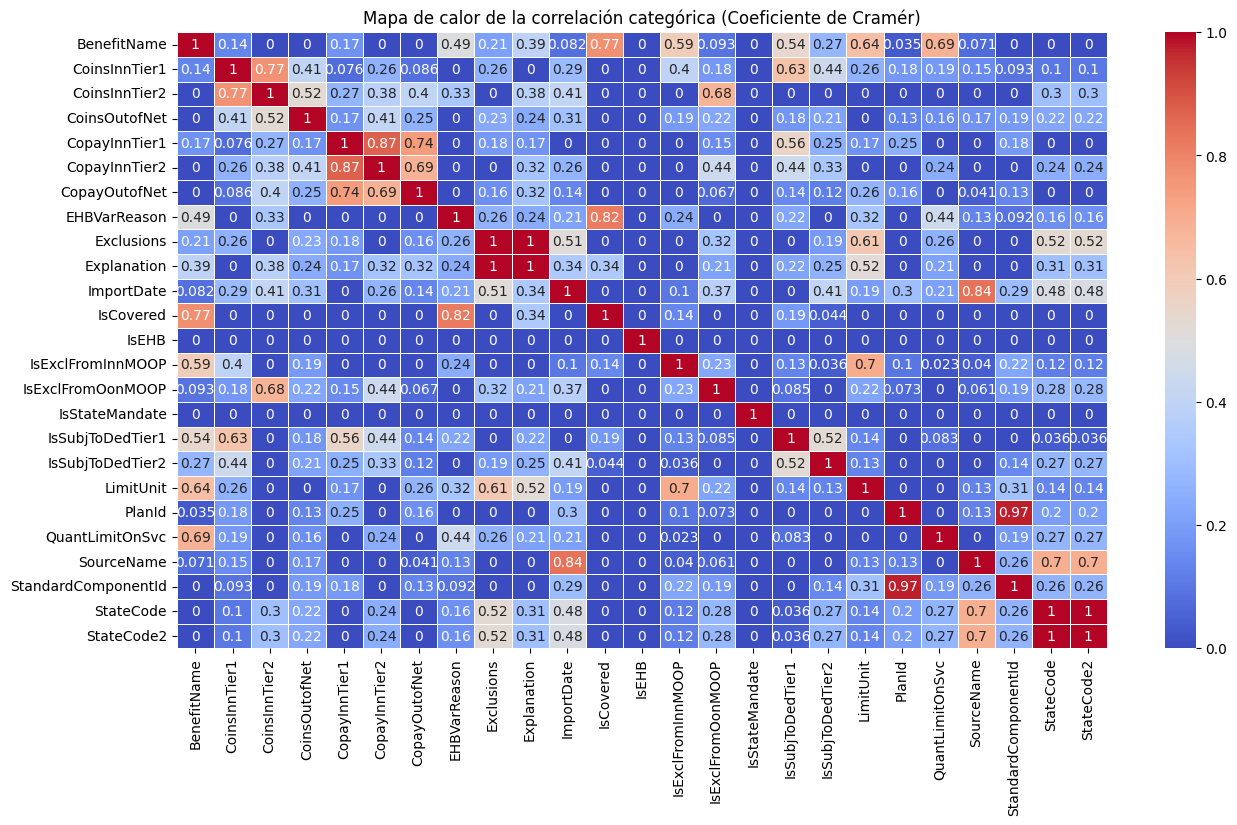

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación categórica con un mapa de calor
plt.figure(figsize=(15, 8))
sns.heatmap(matriz_cramer, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la correlación categórica (Coeficiente de Cramér)')
plt.show()

## Limpieza de datos y Transformación##

Debido a las limitaciones de memoria en Google Colab, se procede a eliminar los datos generados durante el análisis exploratorio de datos (EDA) para liberar recursos.

In [13]:
import gc

# Eliminar las variables
del col_descartadas
del columnas_categoricas
del datos_muestra
del matriz_cramer
del df_benefits_cost_sharing

# Forzar la recolección de basura
gc.collect()

47327

###Pandas###

Primero, se iniciará con la limpieza y transformación de datos utilizando la biblioteca Pandas.
Se inicia con la familiarización de datas he información general



Seimportan las librerías necesarias

In [14]:
import gc
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

Se crea el dataframe con pasndas a partir del csv

In [15]:
start_time = time.time()
start_pandas_time = time.time()
df_pandas= pd.read_csv('BenefitsCostSharing.csv')

pandas_df_time = time.time() - start_time
print(f'tiempo de ejecución para la conversión a dataframe: {pandas_df_time}')

<ipython-input-15-67cb7558fb49>:3: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas= pd.read_csv('BenefitsCostSharing.csv')


tiempo de ejecución para la conversión a dataframe: 28.478275775909424


Se visualizan las primeras 5 filas para visualizar losd atos y la estructura

In [16]:
df_pandas.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


Identidicación de niveles o datos distintos para ver si tienen relevancia para el analisis

In [17]:
start_time = time.time()
cols_cat = df_pandas.columns.tolist() # se capturan los nombres de las columnas del DF

# se inicializa un array para capturar las columnas que se descartarán por poca relevancia
col_descartadas = []

#Con este fragmento de codigo nos damos cuanta cuantos subniveles tiene cada columna, esto nos ayuda a ver cuales son las variables finales para la data
for col in cols_cat:
  print(f'Columna {col}: {df_pandas[col].nunique()} subniveles o distintos.')

  if(df_pandas[col].nunique() <= 1):
    col_descartadas.append(col)

pandas_niveles_time = time.time() - start_time
print(f'tiempo de ejecución para la identificación de niveles: {pandas_niveles_time}')



Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 115 subniveles o distintos.
Columna CoinsInnTier2: 37 subniveles o distintos.
Columna CoinsOutofNet: 60 subniveles o distintos.
Columna CopayInnTier1: 516 subniveles o distintos.
Columna CopayInnTier2: 278 subniveles o distintos.
Columna CopayOutofNet: 232 subniveles o distintos.
Columna EHBVarReason: 12 subniveles o distintos.
Columna Exclusions: 1720 subniveles o distintos.
Columna Explanation: 6227 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 3 subniveles o distintos.
Columna IsEHB: 1 subniveles o distintos.
Columna IsExclFromInnMOOP: 5 subniveles o distintos.
Columna IsExclFromOonMOOP: 4 subniveles o distintos.
Columna IsStateMandate: 1 subniveles o distintos.
Columna IsSubjToDedTier1: 5 subniveles o distintos.
Columna IsSubjToDedTier2: 4 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

Al haber detectado las columnas menos relevantes o que no serán útiles se eliminan para optimizar o reducir la carga de procesamiento al realizar el respectivo análisis o sus visualizaciones

Eliminación de espacios en blanco en los nombres de las columnas

In [18]:
start_time = time.time()

df_pandas.columns = df_pandas.columns.str.strip()

pandas_espacios_blanco_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de espacios en blanco: {pandas_espacios_blanco_time}')

tiempo de ejecución para la eliminación de espacios en blanco: 0.0011622905731201172


Eliminación de las columnas descartadas o irrelevantes.

In [19]:
#
start_time = time.time()

df_pandas.drop(columns=col_descartadas, inplace=True) # Con inplace=True: modifica datos directamente, sin crea un dataframe nuevo
del col_descartadas
del cols_cat
gc.collect()

pandas_irrelevantes_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de columnas irrelevantes: {pandas_irrelevantes_time}')

tiempo de ejecución para la eliminación de columnas irrelevantes: 1.3800430297851562


Se buscan y eliminan los duplicados

In [20]:
start_time = time.time()
# Inicio duplicados
duplicados = df_pandas.duplicated().sum() #contar datos duplicados

#Elimina los duplicados si es que los hay
if duplicados > 1:
  print(f'Tamaño previo: {df_pandas.shape}')
  df_pandas.drop_duplicates(inplace=True)
  print(f'Tamaño posterior: {df_pandas.shape}')
else:
  print('No hay filas duplicadas')
del duplicados
gc.collect()

pandas_duplicados_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de duplicados: {pandas_duplicados_time}')

Tamaño previo: (5048408, 30)
Tamaño posterior: (5048322, 30)
tiempo de ejecución para la eliminación de duplicados: 30.13563060760498


In [21]:
start_time = time.time()
# Normalizar los datos
datos_normalizados = json_normalize(df_pandas)

# Si hay parámetros anidados dentro de los resultados, normalizarlos también
if 'parameters' in datos_normalizados.columns:
  df_parameters = json_normalize(datos_normalizados['parameters'].explode())
  datos_normalizados = datos_normalizados.drop(columns=['parameters']).join(df_parameters, rsuffix='_param')

  df_pandas = pd.DataFrame(datos_normalizados)
  del datos_normalizados
  del df_parameters
  gc.collect()

pandas_normalizar_time = time.time() - start_time
print(f'tiempo de ejecución para la normalización: {pandas_normalizar_time}')

tiempo de ejecución para la normalización: 0.0014352798461914062


Se define que para los datos nulos, se manejan para los alfanumericos con un #N/D y para los numericos -1 en el caso de los date no se localizaron nulos

Verifica los nulos del dataframe

In [22]:
start_time = time.time()

df_pandas.isnull().sum()

pandas_nulos_time = time.time() - start_time
print(f'tiempo de ejecución para la visualización de la cantidad de nulos por columnas: {pandas_nulos_time}')

tiempo de ejecución para la visualización de la cantidad de nulos por columnas: 8.127061605453491


In [23]:
start_time = time.time()
df_pandas.fillna({
    'CoinsInnTier1': '#N/D',
    'CoinsInnTier2': '#N/D',
    'CoinsOutofNet': '#N/D',
    'CopayInnTier1': '#N/D',
    'CopayInnTier2': '#N/D',
    'CopayOutofNet': '#N/D',
    'EHBVarReason': '#N/D',
    'Exclusions': '#N/D',
    'Explanation': '#N/D',
    'IsCovered': '#N/D',
    'IsEHB': '#N/D',
    'IsExclFromInnMOOP': '#N/D',
    'IsExclFromOonMOOP': '#N/D',
    'IsStateMandate': '#N/D',
    'IsSubjToDedTier1': '#N/D',
    'IsSubjToDedTier2': '#N/D',
    'LimitQty': -1,
    'LimitUnit': '#N/D',
    'MinimumStay': -1,
    'QuantLimitOnSvc': '#N/D',
}, inplace=True)

df_pandas.isnull().sum()

pandas_setear_nulos_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de nulos por valores por defecto: {pandas_setear_nulos_time}')

tiempo de ejecución para la eliminación de nulos por valores por defecto: 14.736576318740845


Formato de datetime para los campos fecha

In [24]:
start_time = time.time()

df_pandas['ImportDate'] = pd.to_datetime(df_pandas['ImportDate'],format='mixed')
df_pandas.info()

pandas_info_time = time.time() - start_time
print(f'tiempo de ejecución para visualización de información de variables: {pandas_info_time}')


<class 'pandas.core.frame.DataFrame'>
Index: 5048322 entries, 0 to 5048407
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   BenefitName          object        
 1   BusinessYear         int64         
 2   CoinsInnTier1        object        
 3   CoinsInnTier2        object        
 4   CoinsOutofNet        object        
 5   CopayInnTier1        object        
 6   CopayInnTier2        object        
 7   CopayOutofNet        object        
 8   EHBVarReason         object        
 9   Exclusions           object        
 10  Explanation          object        
 11  ImportDate           datetime64[ns]
 12  IsCovered            object        
 13  IsExclFromInnMOOP    object        
 14  IsExclFromOonMOOP    object        
 15  IsSubjToDedTier1     object        
 16  IsSubjToDedTier2     object        
 17  IssuerId             int64         
 18  IssuerId2            int64         
 19  LimitQty             float

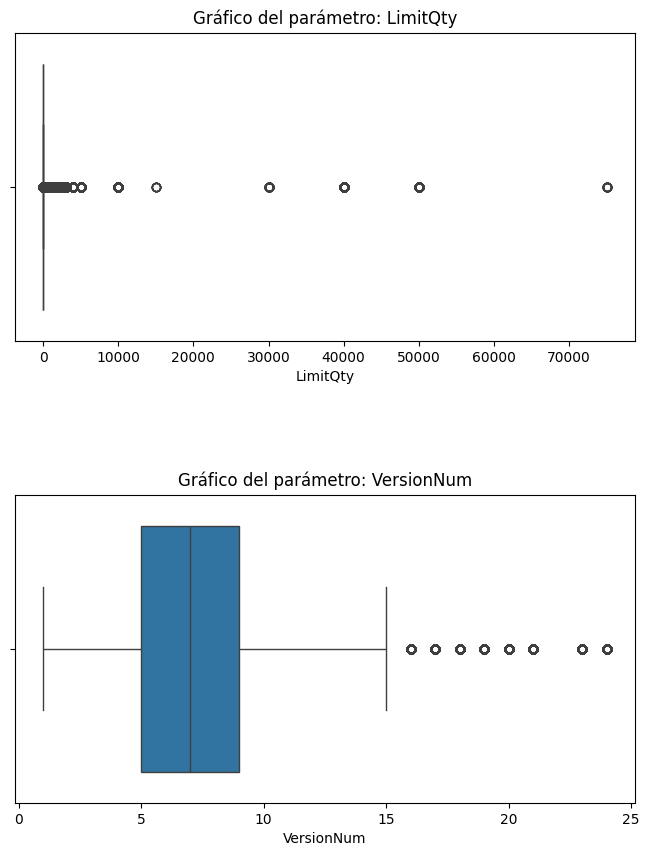

tiempo de ejecución para visualización de outliers: 20.995021104812622


In [25]:
start_time = time.time()

#revision de outliers en variables numericas
cols_num = ['LimitQty','VersionNum']

# Define la estructura del gráfico
fig, ax = plt.subplots(nrows = len(cols_num), ncols = 1, figsize = (8,10))
fig.subplots_adjust(hspace = 0.5) # Espacio entre gráficos

for i, col in enumerate(cols_num):
    sns.boxplot(x = col, data = df_pandas, ax = ax[i]) # información para crear el gráfico
    ax[i].set_title(f'Gráfico del parámetro: {col}') # Nombre del gráfico

plt.show() # Muestra el gráfico
del cols_num
del fig
del ax
gc.collect()

pandas_outliers_time = time.time() - start_time
print(f'tiempo de ejecución para visualización de outliers: {pandas_outliers_time}')



Se utiliza el método desviación estandar para eliminar los outliners

In [26]:

# Usar la desviación estándar para detectar y eliminar outliers
media = df_pandas['LimitQty'].mean()
desviacion_estandar = df_pandas['LimitQty'].std()

# Definir los umbrales de 3 desviaciones estándar
umbral_inferior_std = media - 2 * desviacion_estandar
umbral_superior_std = media + 2 * desviacion_estandar

# Eliminar outliers basados en desviación estándar
df_pandas = df_pandas[(df_pandas['LimitQty'] >= umbral_inferior_std) & (df_pandas['LimitQty'] <= umbral_superior_std)]

del media
del desviacion_estandar
del umbral_inferior_std
del umbral_superior_std
gc.collect()
pandas_elim_outliners_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de outliners: {pandas_elim_outliners_time}')

pandas_time = time.time() - start_pandas_time


tiempo de ejecución para la eliminación de outliners: 27.734482049942017


Se vuelve a graficar para ver el nuevo compartamiento

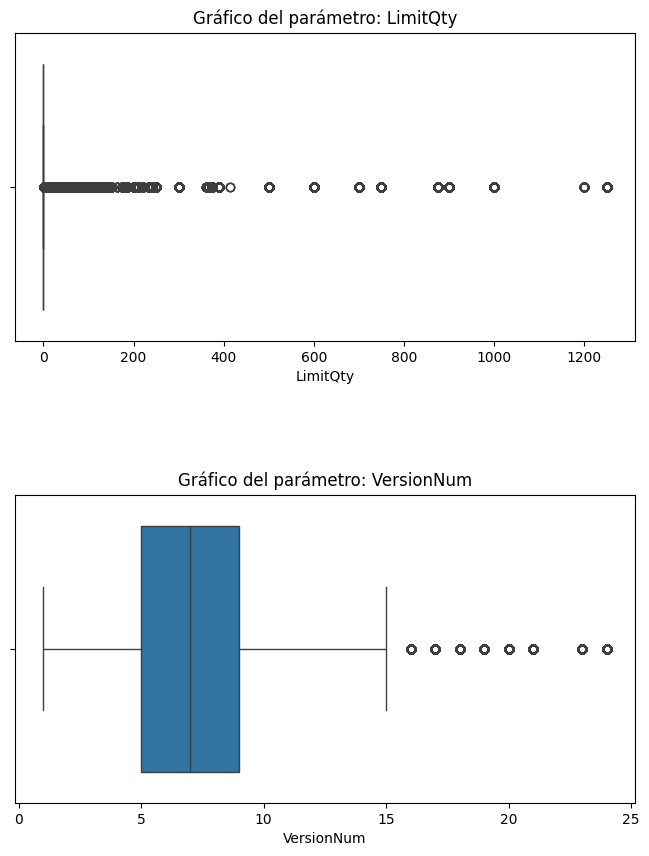

tiempo de ejecución para visualización de outliers: 21.60288715362549


In [27]:
start_time = time.time()

#revision de outliers en variables numericas
cols_num = ['LimitQty','VersionNum']

# Define la estructura del gráfico
fig, ax = plt.subplots(nrows = len(cols_num), ncols = 1, figsize = (8,10))
fig.subplots_adjust(hspace = 0.5) # Espacio entre gráficos

for i, col in enumerate(cols_num):
    sns.boxplot(x = col, data = df_pandas, ax = ax[i]) # información para crear el gráfico
    ax[i].set_title(f'Gráfico del parámetro: {col}') # Nombre del gráfico

plt.show() # Muestra el gráfico
del cols_num
del fig
del ax
del df_pandas
gc.collect()

pandas_outliers_time = time.time() - start_time
print(f'tiempo de ejecución para visualización de outliers: {pandas_outliers_time}')


###VAEX


A continuación, se empleará la biblioteca Vaex.

In [28]:
!pip install vaex

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

Se importan las librerías que se utilizarán para la parte de limpieza con vaex

In [29]:
import gc
import vaex
import matplotlib.pyplot as plt
import seaborn as sns
import time

Se hace una copia de los datos para limpiarlos con vaex.

* *convert=True*: creará un archivo binario más eficiente para futuras cargas si es necesario
* *chunk_size*: ajusta el tamaño de cada porción cargada en memoria

Según Orac (s.f.) se debe convertir el CSV a HDF5 (el Formato de Datos Jerárquicos versión 5) para ver el beneficio real con Vaex. Debido a que Vaex tiene una función para la conversión, que soporta archivos más grandes que la memoria principal. Esto mediante la conversión de trozos más pequeños

In [30]:
start_time = time.time()
start_vaex_time = time.time()
# Cargar los datos en un DataFrame de Vaex
df_vaex = vaex.from_csv('BenefitsCostSharing.csv', convert=True, chunk_size=5_000_000) # Esta función crea un archivo HDF5 y lo persigue en el disco.

vaex_df_time = time.time() - start_time
print(f'tiempo de ejecución para obtención de datos: {vaex_df_time}')

/usr/local/lib/python3.10/dist-packages/vaex/convert.py:71: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_pandas in enumerate(csv_reader):
/usr/local/lib/python3.10/dist-packages/vaex/convert.py:71: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_pandas in enumerate(csv_reader):


tiempo de ejecución para obtención de datos: 134.54650831222534


Se utiliza el archivo hdf5 ya que es más eficiente para el consumo de memoria, y como se estarán manipulando los datos para la limpieza y transformación es mejor

In [31]:
start_time = time.time()

df_vaex = vaex.open('BenefitsCostSharing.csv.hdf5')

vaex_df_open_time = time.time() - start_time
print(f'tiempo de ejecución para obtención de datos, apertura y transformación de datos a hdf5: {vaex_df_open_time}')

tiempo de ejecución para obtención de datos, apertura y transformación de datos a hdf5: 0.06571555137634277


In [32]:
# Muestra las primeras 5 filas
df_vaex[:5]

#,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,--,20%,No Charge,--,No Charge,Above EHB,--,'Combined annual benefit maximum of $1000 per ye...,2014-03-19 07:06:49,Covered,--,No,No,--,No,No,21989,21989,1000,Dollars per Year,nan,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,--,20%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,No,No,21989,21989,1,Visit(s) per 6 Months,nan,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,--,40%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,--,50%,No Charge,--,No Charge,Additional EHB Benefit,--,"'24 month waiting period, See policy for additio...",2014-03-19 07:06:49,Covered,--,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,--,50%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,112,HIOS,21989AK0010001,AK,AK,6


Revisando la documentación de Vaex (s.f.) se identificó que se pueden obtener los nomrbes de las columnas con el método *get_column_names()*. Por lo que se procedió a capturar los nombres de las columnas, para detectar las menos relevantes con el unique id, ya que 0 significa que no hay datos y 1 es que se repite un mismo dato dentro de todas las filas.

Esto con el fin de replicar lo mismo que se hizo con pandas, apra compara los rendimientos

In [33]:
start_time = time.time()

# Capturar los nombres de las columnas del DataFrame
cols_cat = df_vaex.get_column_names()

# Inicializar un array para las columnas que se descartarán
col_descartadas = []

# Contar cuántos subniveles tiene cada columna
for col in cols_cat:
    unique_count = df_vaex[col].nunique()
    print(f'Columna {col}: {unique_count} subniveles o distintos.')

    if unique_count <= 1:
        col_descartadas.append(col)


del cols_cat
# Forzar la recolección de basura
gc.collect()

vaex_niveles_time = time.time() - start_time
print(f'tiempo de ejecución para obtención de datos niveles {vaex_niveles_time}')

Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 116 subniveles o distintos.
Columna CoinsInnTier2: 38 subniveles o distintos.
Columna CoinsOutofNet: 61 subniveles o distintos.
Columna CopayInnTier1: 517 subniveles o distintos.
Columna CopayInnTier2: 279 subniveles o distintos.
Columna CopayOutofNet: 233 subniveles o distintos.
Columna EHBVarReason: 13 subniveles o distintos.
Columna Exclusions: 1721 subniveles o distintos.
Columna Explanation: 6228 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 4 subniveles o distintos.
Columna IsEHB: 2 subniveles o distintos.
Columna IsExclFromInnMOOP: 6 subniveles o distintos.
Columna IsExclFromOonMOOP: 5 subniveles o distintos.
Columna IsStateMandate: 2 subniveles o distintos.
Columna IsSubjToDedTier1: 7 subniveles o distintos.
Columna IsSubjToDedTier2: 6 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

La siguiente líneas de código elimina las columnas menos relevantes tomando en cuenta que no tengan datos en todas las líneas o se repita un mismo tipo de dato en todas las filas. Esto se hizo basado en la documentación de Vaex (s.f.), ya que revisando se menciona el df.drop() que se utiliza para eliminar

In [34]:
start_time = time.time()
# Eliminar columnas que se descartarán
df_vaex = df_vaex.drop(columns=col_descartadas)

del col_descartadas
# Forzar la recolección de basura
gc.collect()

vaex_irrelevantes_time = time.time() - start_time
print(f'tiempo de ejecución para eliminación de columnas irrelevantes: {vaex_irrelevantes_time}')

tiempo de ejecución para eliminación de columnas irrelevantes: 0.14684605598449707


Eliminación de espacios en blanco

In [35]:
start_time = time.time()

# Renombrar todas las columnas quitando espacios en blanco al inicio y al final
for col in df_vaex.get_column_names():
  new_col_name = col.strip()
  # Quitar espacios en blanco
  if col != new_col_name:
    # Solo renombrar si el nombre ha cambiado
    df_vaex = df_vaex.rename(col, new_col_name)

vaex_espacios_blanco_time = time.time() - start_time
print(f'tiempo de ejecución para la eliminación de espacios en blanco: {vaex_espacios_blanco_time}')

tiempo de ejecución para la eliminación de espacios en blanco: 0.00022482872009277344


Se realizó una investigación en la documentaciónd de Vaex (s.f.) y no se encontró una función que elimine los duplicados como en pandas, por lo que se procedió a realizar manualmente con el código proporcionado en (Ruiz, 2022)

Si se detectan duplicados se eliminan. Se realizó una revisión a la documentación de Vaex (s.f.) y se identificó que el método para eliminar duplicados es el *.drop_duplicates()*

In [36]:
start_time = time.time()

# Obtener los nombres de las columnas
columns = {"Exclusions","Explanation","IssuerId","EHBVarReason"}

print(f'Tamaño previo: {df_vaex.shape}')
df_vaex.groupby(columns, agg={'__hidden_count': vaex.agg.count()}).drop('__hidden_count')
print(f'Tamaño posterior: {df_vaex.shape}')

vaex_duplicados_time = time.time() - start_time
print(f'tiempo de ejecución para eliminación de duplicados: {vaex_duplicados_time}')

Tamaño previo: (5048408, 32)
Tamaño posterior: (5048408, 32)
tiempo de ejecución para eliminación de duplicados: 3.734005928039551


Se normalizan los datos, en donde se revisa qué columnas son de tipo diccionario y se expande para agregar nuevas columnas al dataframe y eliminar las columnas de tipo dict, que puede ser más difíciles para la limpieza

In [37]:
start_time = time.time()

# Revisa los tipos de las columnas y expande los diccionarios en el mismo DataFrame
for column in columns:
    if df_vaex[column].dtype == 'object':
        # Comprobar si los valores son diccionarios
        is_dict = df_vaex[column].apply(lambda x: isinstance(x, dict)).sum()
        if is_dict > 0:
            print(f"La columna '{column}' contiene diccionarios.")

            # Expande la columna de diccionarios en columnas separadas
            dict_df = df_vaex[column].to_dataframe()
            for dict_column in dict_df.get_column_names():
                df_vaex[f"{column}_{dict_column}"] = dict_df[dict_column]

            # Elimina la columna original que contenía los diccionarios
            df_vaex = df_vaex.drop(column)


# Forzar la recolección de basura
gc.collect()

vaex_normalizacion_time = time.time() - start_time
print(f'tiempo de ejecución para normalización: {vaex_normalizacion_time}')

tiempo de ejecución para normalización: 0.14258408546447754


In [38]:
# Muestra las primeras 5 filas
df_vaex[:5]

#,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,--,20%,No Charge,--,No Charge,Above EHB,--,'Combined annual benefit maximum of $1000 per ye...,2014-03-19 07:06:49,Covered,--,No,No,--,No,No,21989,21989,1000,Dollars per Year,nan,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,--,20%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,No,No,21989,21989,1,Visit(s) per 6 Months,nan,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,--,40%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,--,50%,No Charge,--,No Charge,Additional EHB Benefit,--,"'24 month waiting period, See policy for additio...",2014-03-19 07:06:49,Covered,--,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,--,50%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,112,HIOS,21989AK0010001,AK,AK,6


Se revisa la documentación de Vaex(s.f.) y no se encontró método que analice los nulos del dataframe, pero según Joco (2021) la forma que se puede hacer es analizando los nulos por columna
Se revisa la cantidad de nulos que tiene el dataframe.

In [39]:
start_time = time.time()

# Contar nulos en cada columna del DataFrame
count_na = []  # guarda el conteo de nulos por columna

for col in df_vaex.column_names:
    count_na.append(df_vaex[col].isna().sum().item())

all_nulls = pd.Series(data = count_na, index = df_vaex.column_names).sort_values(ascending=True)

print(f'Cuenta de nulos {all_nulls}')

del count_na, all_nulls
# Forzar la recolección de basura
gc.collect()

vaex_cant_nulos_time = time.time() - start_time
print(f'tiempo de ejecución para visualizar cantidad de nulos: {vaex_cant_nulos_time}')

Cuenta de nulos BenefitName                  0
StateCode                    0
StandardComponentId          0
SourceName                   0
RowNumber                    0
PlanId                       0
IssuerId2                    0
IssuerId                     0
StateCode2                   0
ImportDate                   0
VersionNum                   0
BusinessYear                 0
IsCovered               215980
IsExclFromOonMOOP       982626
IsExclFromInnMOOP       983986
CoinsInnTier1          1113847
CopayInnTier1          1113847
CoinsOutofNet          1113847
CopayOutofNet          1113849
IsEHB                  1817362
IsSubjToDedTier1       2417469
IsSubjToDedTier2       2417646
EHBVarReason           3020737
QuantLimitOnSvc        3264532
Explanation            4075700
IsStateMandate         4250463
LimitUnit              4360539
LimitQty               4360725
CopayInnTier2          4571587
CoinsInnTier2          4571587
Exclusions             4572247
MinimumStay            

Se define que para los datos nulos, se manejan para los alfanumericos con un #N/D y para los numericos -1 en el caso de los date no se localizaron nulos

In [40]:
start_time = time.time()

# Definir un valor predeterminado común para columnas de tipo string
default_string = '#N/D'
default_integer = -1

# Rellenar NaN de manera más eficiente
columns_to_fill = {
  'CoinsInnTier1': default_string,
  'CoinsInnTier2': default_string,
  'CoinsOutofNet': default_string,
  'CopayInnTier1': default_string,
  'CopayInnTier2': default_string,
  'CopayOutofNet': default_string,
  'EHBVarReason': default_string,
  'Exclusions': default_string,
  'Explanation': default_string,
  'IsCovered': default_string,
  'IsEHB': default_string,
  'IsExclFromInnMOOP': default_string,
  'IsExclFromOonMOOP': default_string,
  'IsStateMandate': default_string,
  'IsSubjToDedTier1': default_string,
  'IsSubjToDedTier2': default_string,
  'LimitQty': default_integer,
  'LimitUnit': default_string,
  'MinimumStay': default_integer,
  'QuantLimitOnSvc': default_string,
}

# Rellenar NaN en columnas específicas
for column, value in columns_to_fill.items():
  df_vaex[column] = df_vaex[column].fillna(value)

vaex_nulos_time = time.time() - start_time
print(f'tiempo de ejecución para rellenar nulos: {vaex_nulos_time}')

tiempo de ejecución para rellenar nulos: 0.051067352294921875


Se procede a aplicar el formato de datetime para los campos fecha

In [41]:
# Convertir fechas
df_vaex['ImportDate'] = df_vaex['ImportDate'].astype('datetime64[ms]')

Se procede a realizar una revisión de los outliers de las columnas de interés, en este caso de *LimitQty* y *VersionNum*

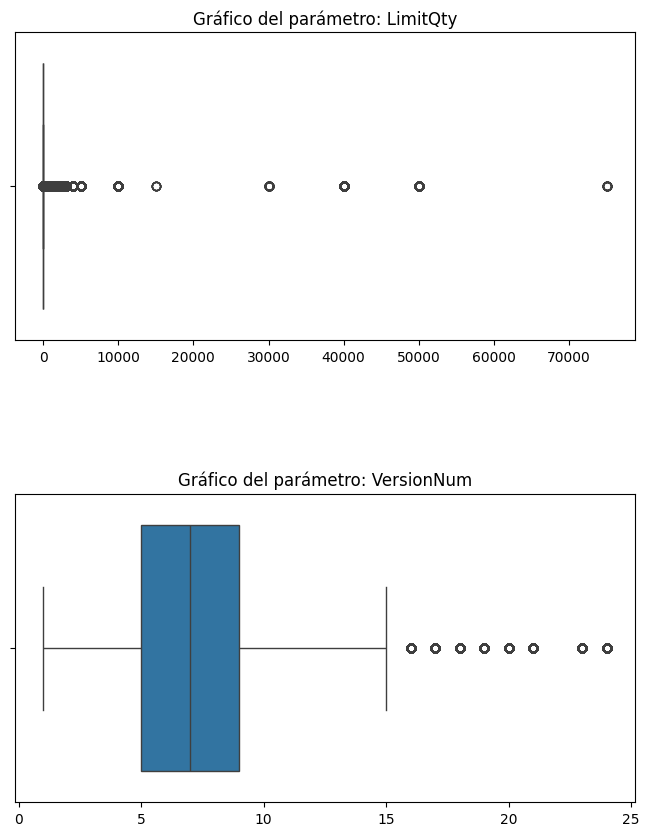

tiempo de ejecución para visualizar outliers: 21.51722526550293


In [42]:
start_time = time.time()

# Revisión de outliers en variables numéricas
cols_num = ['LimitQty', 'VersionNum']

# Crear gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_vaex[col].to_numpy(), ax=ax[i])  # Convertir a numpy para seaborn
    ax[i].set_title(f'Gráfico del parámetro: {col}')

plt.show()

del cols_num, fig,ax
gc.collect()

vaex_outliers_time = time.time() - start_time
print(f'tiempo de ejecución para visualizar outliers: {vaex_outliers_time}')

Se procede a calcular la media y desviación estandar. Así como a filtrar los outliers

In [43]:
start_time = time.time()

# Calcular la media y la desviación estándar
media = df_vaex['LimitQty'].mean()
desviacion_estandar = df_vaex['LimitQty'].std()

# Definir umbrales para detectar outliers
umbral_superior = media + 2 * desviacion_estandar
umbral_inferior = media - 2 * desviacion_estandar

# Filtrar outliers
df_vaex = df_vaex[(df_vaex['LimitQty'] >= umbral_inferior) & (df_vaex['LimitQty'] <= umbral_superior)]

# Liberar memoria
del media, desviacion_estandar,umbral_inferior,umbral_superior
gc.collect()

vaex_elim_outliers_time = time.time() - start_time
print(f'tiempo de ejecución para eliminar outliers: {vaex_elim_outliers_time}')


vaex_time = time.time() - start_vaex_time


tiempo de ejecución para eliminar outliers: 0.4320497512817383


Se vuelve a graficar para ver el nuevo compartamiento

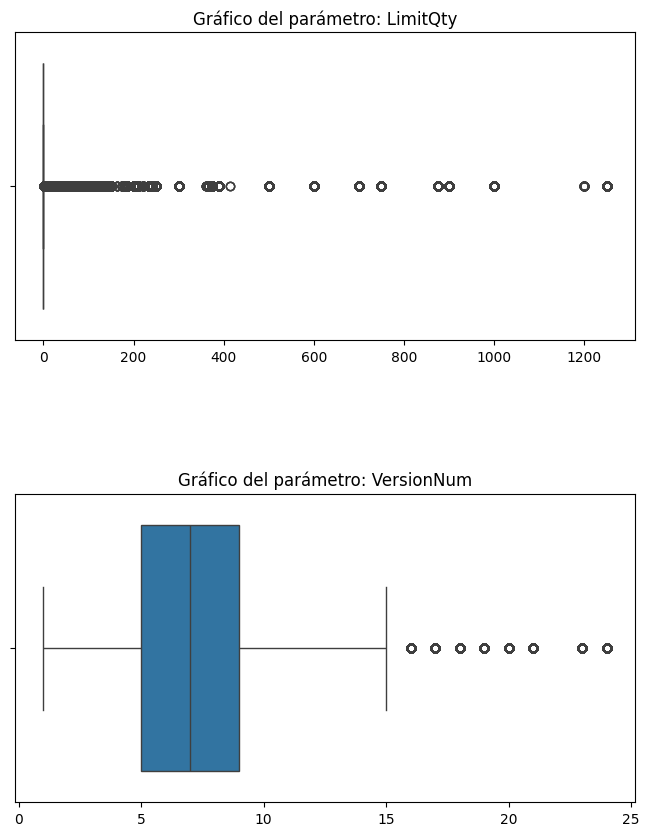

tiempo de ejecución para visualizar outliers: 21.752147674560547


In [44]:

start_time = time.time()

# Revisión de outliers en variables numéricas
cols_num = ['LimitQty', 'VersionNum']

# Crear gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_vaex[col].to_numpy(), ax=ax[i])  # Convertir a numpy para seaborn
    ax[i].set_title(f'Gráfico del parámetro: {col}')

plt.show()

del cols_num, fig,ax, df_vaex
gc.collect()

vaex_outliers_time = time.time() - start_time
print(f'tiempo de ejecución para visualizar outliers: {vaex_outliers_time}')

#Conclusiones finales#

###Análisis de rendimiento###

A continuación, se realiza la comparativa de rendimiento entre la limpieza de Pandas y Vaex obteniendo los tiempos de ejecución de cada proceso de limpieza y transformación de datos.


In [45]:
compara= pd.DataFrame({
    "Proceso": ["Dataframe","Niveles","Espacios en blanco","Irrelevantes","Duplicados","Nulos","Normalizar","Outlier","Eliminación de outlier",],
    "Pandas": [pandas_df_time,
               pandas_niveles_time,
               pandas_espacios_blanco_time,
               pandas_irrelevantes_time,
               pandas_duplicados_time,
               pandas_nulos_time,
               pandas_normalizar_time,
               pandas_outliers_time,
               pandas_elim_outliners_time],
    "Vaex": [vaex_df_time,
             vaex_niveles_time,
             vaex_espacios_blanco_time,
             vaex_irrelevantes_time,
             vaex_duplicados_time,
             vaex_nulos_time,
             vaex_normalizacion_time,
             vaex_outliers_time,
             vaex_elim_outliers_time]
})


<Figure size 1000x600 with 0 Axes>

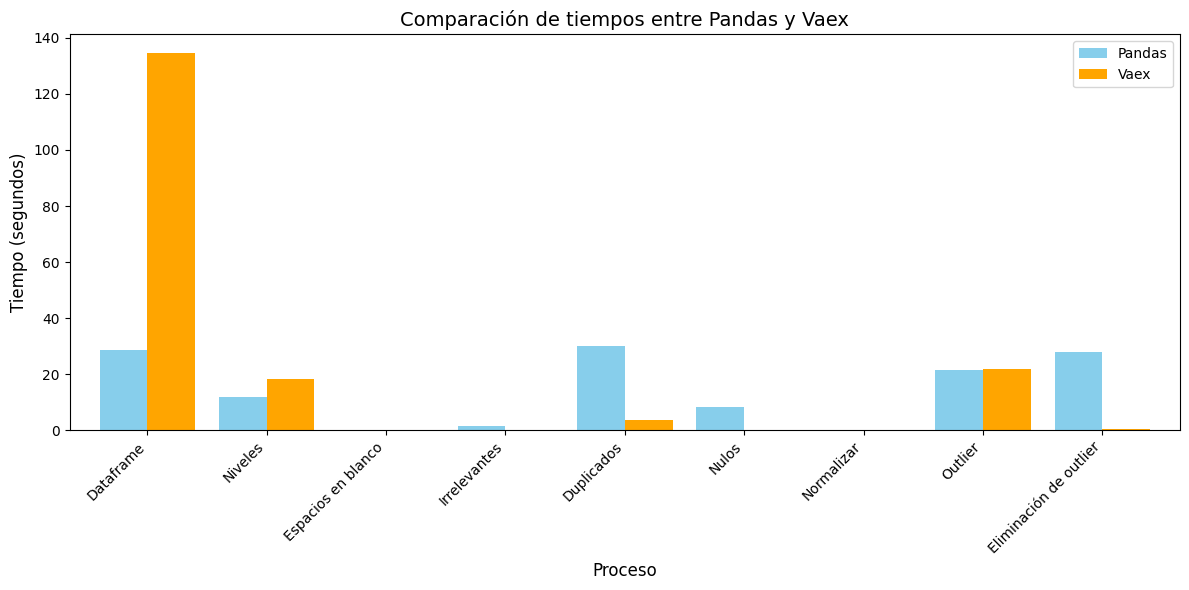

In [46]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar las barras
compara.plot(kind='bar', x='Proceso', width=0.8, figsize=(12, 6), color=['skyblue', 'orange'])

# Añadir etiquetas y título
plt.xlabel('Proceso', fontsize=12)
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.title('Comparación de tiempos entre Pandas y Vaex', fontsize=14)

# Añadir leyenda
plt.legend(['Pandas', 'Vaex'], loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Con base a las métricas de tiempo se puede concluir lo siguiente:

**En la carga inicial de datos:**

**Vaex** sobresalió en la carga inicial de grandes volúmenes de datos gracias a su capacidad para manejar datos fuera de memoria y su enfoque en la eficiencia de lectura. Esto lo hace ideal para trabajar con datasets muy grandes que no caben en la memoria RAM.

Aunque **Pandas** también es capaz de manejar grandes volúmenes de datos, su rendimiento puede verse afectado cuando se trabaja con datasets extremadamente grandes debido a su enfoque en la manipulación en memoria.

**Limpieza de Valores Nulos e Irrelevantes:**

**Vaex** mostró un rendimiento superior en la identificación y eliminación de valores nulos e irrelevantes, aprovechando su capacidad para realizar operaciones en paralelo y su eficiente manejo de memoria.

Aunque **Pandas** es muy capaz en esta tarea, puede ser menos eficiente en comparación con Vaex cuando se trata de datasets muy grandes.

**Eliminación de Duplicados:**

**Pandas** fue más eficiente en la eliminación de duplicados, gracias a sus funciones optimizadas y su facilidad de uso para realizar estas operaciones de manera rápida y efectiva.

Aunque **Vaex** también puede eliminar duplicados, su rendimiento en esta tarea específica no fue tan destacado como el de Pandas.

**Normalización de Datos:**

**Pandas** destacó en la normalización
de datos debido a su amplia gama de funciones y métodos disponibles para transformar y escalar datos de manera eficiente.

Si bien **Vaex** es capaz de realizar normalizaciones, **Pandas** ofrece una mayor flexibilidad y opciones más avanzadas para estas tareas


###Ventajas y desventajas en función del dataset###

In [47]:
print("Pandas")

pd.DataFrame({
  "Ventajas": ["Alta eficiencia",
                 "Fácil de usar",
                 "Buena documentación",
                 "Integración con otras bibliotecas",
                 "Sintaxis similar a SQL.",
                 "trae funciones predetermiandas muy útiles, como el isnull, info, duplicated"],
  "Desventajas": ["Curva de aprendizaje",
                    "Limitaciones en grandes volúmenes de datos",
                    "","","",""]
})

Pandas


,Ventajas,Desventajas
0,Alta eficiencia,Curva de aprendizaje
1,Fácil de usar,Limitaciones en grandes volúmenes de datos
2,Buena documentación,
3,Integración con otras bibliotecas,
4,Sintaxis similar a SQL.,
5,"trae funciones predetermiandas muy útiles, com...",


In [48]:
print("Vaex")

pd.DataFrame({
    "Ventajas": ["Similar a Pandas",
                 "Buena con grandes volúmenes de datos",
                 "Crea un archivo hdf5 que es más efectivo para el uso de memoria, lo que hace que ciertas tareas de limpieza o manipulación de datos sean más rápidas",
                 "Si se quiere reabrir el documento para convertirlo en dataframe vaez lo hace en segundos debido a que guarad un chunk"],
    "Desventajas": ["Tarda más en convertir el csv a datafrmae",
                    "Alto consumo de memoria a la hora de convertir el csv a dataframe",
                    "No hay métodos por defecto para algunas funciones comunes, como la de encontrar duplicados o nulos del dataframe (solo lo hace por columna).En donde pandas sí las tiene por defecto",
                    "La documentación está bien estructurada y entendible, pero hay funcionalidades que el creador de veax las explica en foros y no en la propia documentación"]

})

Vaex


,Ventajas,Desventajas
0,Similar a Pandas,Tarda más en convertir el csv a datafrmae
1,Buena con grandes volúmenes de datos,Alto consumo de memoria a la hora de convertir...
2,Crea un archivo hdf5 que es más efectivo para ...,No hay métodos por defecto para algunas funcio...
3,Si se quiere reabrir el documento para convert...,La documentación está bien estructurada y ente...


###¿Cómo las técnicas de tratamiento y limpieza mejoraron el conjunto de datos para el análisis?

Para mejorar la calidad del conjunto de datos y obtener un análisis más preciso, se implementaron técnicas de limpieza y transformación de datos. En el conjunto de datos seleccionado, se aplicaron procesos como la eliminación de duplicados, el manejo de valores faltantes, la normalización de las variables, la detección y eliminación de valores atípicos, y la eliminación de columnas irrelevantes o con datos incompletos.

Estas acciones no solo permitieron optimizar el tamaño del conjunto de datos, sino que también garantizaron la consistencia de la información, evitando análisis sesgados o distorsionados debido a datos incongruentes.


###Conclusión###

Realizando una revisión de la comparativa de resultados y el análisis de rendimiento se determinó que Vaex es una herramienta muy útil para grandes cantidades de datos, debido a que hace un archivo hdf5 que es más eficiente con la memoria, si se quieren manipular los datos en varias acciones. Aunque el trabajar directamente con el archivo csv hace que el rendimiento de Vaex decaiga mucho, lo que va ocasionando problemas de rendimiento. Vaex en comparación con Pandas es más efectivo cuando se habla de millones de datos ya que, por el tipo de archivo que crea y la implementación de chunks, los datos son más eficientes de manipular.
Centralizando el enfoque al presente trabajo, Vaex tuvo un rendimiento peor que Pandas debido a los métodos de limpieza que se utilizaron para esta investigación. ¿Por qué? Se debió a que al hacer la comparativa se decidió eliminar nulos y quitar duplicados; en donde Pandas trae funcionalidades por defecto en sus recursos para hacerlo, por el contrario Vaex actualmente no tiene un método propio para eliminar duplicados y se debe hacer de forma manual aplicando un groupby. Aplicar este método manualmente hace que se consuma mucha memoria por la cantidad de datos, y se "disparan" los recursos del notebook. Asimismo, para la función de nulos Pandas trae una funcionalidad por defecto para detectar todos los nulos en el dataframe, pero Vaex solo trae por columna y esto implica que se deba hacer una parte manual.
Además, en comparación la documentación de pandas es más clara que la de Vaex. Debido a que para averiguar sobre funcionalidades que aún no están disponibles en Vaex, se tuvo que ir a los comentarios del repositorio en donde el creador da una explicación de qué funcionalidades no están y el porqué. Esto es tedioso porque la documentación no está centralizada y la documentación oficial no tiene mucha verbosidad, por lo que si se tienen pocos conocimientos es más grande la curva de aprendizaje.

Para este trabajo, Pandas tuvo un mejor rendimiento ya que el consumo de memoria era (dentro de lo cabe) constante, en donde sí era bastante alto el consumo llegando a unos 9GB de memoria ram, pero no se producían picos de trabajo que detuvieran el colab. En cambio Vaex en ciertos procesos (como el de duplicados y el de crear el dataframe con el archivo hdf5) producía picos de consumo que provocaba una caída del colab. Esto provocó que se complicara poder hacer la comparación entre ambos sistemas. Aun así, si se reconectaba el colab Vaex funcionaba mejor ya que el archivo .hdf5 ya estaba creado y solo se debía hacer un open al archivo. Con esto sí se veía un rendimiento comparable o hasta mejor en ciertos procesos.

###Recomendaciones###

Se recomienda utilizar:


* Vaex directamente con el archivo hdf5.
* Para la manipulación de nulos y duplicados, se recomienda utilizar Pandas debido a que posee funcionalidades integradas dentro de la propia librería.
* Se recomienda la eliminación de variables que no se usan constantemente para liberar el espacio en memoria al utilizar Vaex, debido a los picos de consumo de memoria en ciertos procesos de manipulación de datos.
* Se recomienda utilizar Vaex cuando se esta trabajando con un dataset de millones de datos, dado que Pandas tiene un límite en donde es complicado la manipulación de datos por el uso de memoria.



# Referencias

Centers for Medicare & Medicaid Services. (2024). *Benefits and Cost Sharing Public Use File Data Dictionary*.Recuperado de: https://www.cms.gov/files/document/benefitscostsharing-datadictionary-py24.pdf

Cramér, H. (1946). Mathematical Methods of Statistics. Princeton University Press.

Joco. (2021, 13 de junio). *What is the Vaex command for pd.isnull().sum()?* Stack Overflow. https://stackoverflow.com/questions/67886396/what-is-the-vaex-command-for-pd-isnull-sum

Kentaro, W. (2024). *gdown. PyPI*. Recuperado de: https://pypi.org/project/gdown/

Nik. (n.d.). How to Calculate Cramer’s V in Python. datagy.io1. Retrieved September 22, 2024, from https://datagy.io/cramers-v-python/
OpenAQ. (s.f.). Introduction. OpenAQ API Documentation. https://docs.openaq.org/docs/introduction

Orac, R. (s.f.). *Cómo procesar un DataFrame con millones de filas en segundos.* Datasource.ai. https://www.datasource.ai/es/data-science-articles/como-procesar-un-dataframe-con-millones-de-filas-en-segundos

Ruiz, V. (2022, 25 de mayo). *How to drop duplicates in Vaex?* Stack Overflow. https://stackoverflow.com/questions/63531958/how-to-drop-duplicates-in-vaex

Shizubu, C. (2021, March 15). *Download data from anywhere into Google Colab using gdown. Medium*. Recuperado de: https://ctshizubu.medium.com/download-data-from-anywhere-into-google-colab-using-gdown-eb6ab383875c

U.S. Department of Health and Human Services. (n.d.). *Health Insurance Marketplace. Kaggle*. Recuperado de: https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/data

Vaex. (s.f.). *API reference*. Vaex Documentation. https://vaex.readthedocs.io/en/latest/api.html

Vaexio. (2020, mayo 17). Remove duplicates in text data? [Issue #746]. GitHub. https://github.com/vaexio/vaex/issues/746

